In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%pprint
notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
print([fn for fn in dir(s) if not fn.startswith('_')])
%who

Pretty printing has been turned OFF
C:\Users\dev\Documents\repositories\notebooks\Miscellaneous\ipynb\Untitled.ipynb
data_folder: ../data/
saves_folder: ../saves/
['attempt_to_pickle', 'data_csv_folder', 'data_folder', 'encoding_type', 'load_csv', 'load_dataframes', 'load_object', 'save_dataframes', 'saves_csv_folder', 'saves_folder', 'saves_pickle_folder', 'store_objects']
Config	 SequenceMatcher	 Storage	 check_4_doubles	 check_for_typos	 conjunctify_list	 copyfile	 csv	 encoding	 
get_git_lfs_track_commands	 get_module_version	 get_notebook_path	 get_specific_gitignore_files	 humanize_bytes	 ipykernel	 json	 jupyter_config_dir	 notebook_path	 
notebookapp	 os	 pd	 pickle	 print_all_files_ending_starting_with	 print_all_files_ending_with	 print_all_files_starting_with	 re	 remove_empty_folders	 
s	 similar	 subprocess	 sys	 time	 urllib	 


In [39]:

txt_dir = os.path.join(s.data_folder, 'txt')
file_path = os.path.join(txt_dir, 'Past_Week_Reviews.txt')
with open(file_path, 'r', encoding=s.encoding_type) as f:
    reviews_str = f.read()
reviews_list = re.split('^( +)- ', reviews_str, 0, re.MULTILINE)

In [60]:

from datetime import datetime

date_format = '%A, %B %d, %Y'
rows_list = []
test_set = set()
columns_list = ['review_date', 'review_sign', 'review_type', 'review_item']
row_dict = {}
for i in range(1, len(reviews_list), 2):
    indentation_level = len(reviews_list[i])
    review_item = reviews_list[i+1].strip()
    if indentation_level == 2:
        review_date = datetime.strptime(review_item, date_format)
        row_dict['review_date'] = review_date
    elif indentation_level == 4:
        if 'positive' in review_item.lower():
            review_sign = 1
        elif 'negative' in review_item.lower():
            review_sign = -1
        elif 'outrage' in review_item.lower():
            review_sign = 1
        row_dict['review_sign'] = review_sign
    elif indentation_level == 6:
        row_dict['review_type'] = review_item
    elif indentation_level > 6:
        if indentation_level == 8:
            prefix_str = '{}: '.format(review_item)
        elif indentation_level > 8:
            review_item = '{}{}'.format(prefix_str, review_item)
        row_dict['review_item'] = review_item
        rows_list.append(row_dict.copy())
reviews_df = pd.DataFrame(rows_list, columns=columns_list).set_index('review_date')

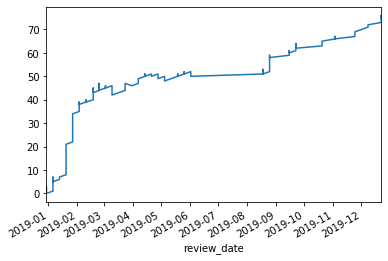

In [61]:

%matplotlib inline

#print([fn for fn in dir(reviews_df) if 'cum' in fn.lower()])
axes_subplot_obj = reviews_df.review_sign.cumsum().plot.line()

In [66]:

match_series = (reviews_df.review_sign < 0)
for r in reviews_df[match_series].review_item.tolist():
    if ('Jay' in r) or ('Gianna' in r):
        print(r)

Dealing with Jay and his problems
Jay’s Arraignment
Jay’s car hunting
Jay
Jay: Jay spent all our grocery money
Jay: Jay is making us pay for his bad choices
Jay got super angry and refused to do YNAB
Jay still hasn't completed YNAB
Jay still doesn't have his own car
Jay wants us to buy him a new engine
Jay is economically dependent and blames everyone but himself
Jay is threatening to kill himself
Jay Babbitt always in catastrophic mode
Gianna doesn’t want to go to a biblical church
Jay accused me of stealing and went on a rant


In [67]:

match_series = (reviews_df.review_sign > 0)
for r in reviews_df[match_series].review_item.tolist():
    print(r)

Megan Hopkins' telling me that the other interviewers thought I was "one f**ing smart dude"
Had lunch with Steve
Helped Jay push his car
Booked a flight to AZ for our vacation
Booked a flight to AZ for our vacation: Steve booked one too
Listened to some great podcasts
Listened to some great podcasts: Paul VanderKlay
Listened to some great podcasts: Jordan Peterson
Made some great comments on Twitter
Didn't click any NSFW links on Reddit
Watched Nassim Taleb take down the whole cabal of Twitter IQ racists in one go
YouTube
“The energy evident in a body of work is the most honest signal about it that makes people trust you to do things for them.” @vgr
Eating
Watching Amazon Prime
Watching Agadmator's chess channel on YouTube
Facebook
Facebook: Oops! You added too much SOCIALISM
Twitter
Chess on lichess.org
Jupyter notebooks
Jupyter notebooks: speedtest.net stats
J.Sack @JayTSack Woke Economics Thread:
YouTube
YouTube: PART ONE: Bret Weinstein, Heather Heying & the Evergreen Equity Counci